# 문제
1. corona.csv 파일 로드
2. Unnamed: 0 컬럼을 삭제
3. 컬럼을 첫번째부터 세번째까지 컬럼만두고 전부 삭제
4. 컬럼의 이름 변경 ['등록일시', '누적사망자', '누적확진자']
5. 등록일시를 기준으로 오름차순 정렬
6. 일일확진자와 일일사망자 파생변수 생성(결측치는 0으로 대체)
7. 일일확진자가 음수인 값을 삭제
8. 등록일시를 시계열로 변경하고 인덱스로 변경
9. 요일이라는 파생변수를 만들어서 요일 대입
10. 요일 컬럼 0 -> 월, 1 -> 화, ... 6 -> 일 로 변경
11. 요일별 일일 확진자의 평균을 바 그래프로 표시
12. 요일별 일일 사망자의 평균을 바 그래프로 표시 

In [98]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import platform

In [99]:
# 1
df = pd.read_csv("../csv/corona.csv", usecols=[1,2,3])     # parse_dates=[0] : 첫번째 컬럼을 시계열로 바꾼다
df.columns = ['등록일시', '누적사망자', '누적확진자']

In [100]:
#df.drop('Unnamed: 0', axis=1, inplace=True)
#df.drop(df.columns[3:], axis=1, inplace=True)

In [101]:
df.sort_values('등록일시', inplace=True)

In [102]:
df['일일확진자'] = df['누적확진자'].diff().fillna(0)
# df['일일확진자'] = (df['누적확진자]-df['누적확진자'].shift()).fillna(0)
df['일일사망자'] = df['누적사망자'].diff().fillna(0)

In [103]:
# 7
df = df.loc[df['일일확진자'] >= 0]

In [104]:
# 8
df['등록일시'] = pd.to_datetime(df['등록일시'], format='%Y-%m-%d')
df.set_index('등록일시', inplace=True)

In [105]:
# 9
#df['요일'] = df.index.dayofweek
for i in df.index:
    df.loc[i, '요일'] = i.weekday()

In [108]:
_list = df['요일'].astype(int).unique()

In [111]:
week_name = ['월', '화', '수', '목', '금', '토', '일']

for i in _list:
    df.loc[df['요일'] == i, '요일'] = week_name[i]

In [112]:
df['요일'].value_counts()

화    118
수    118
금    117
토    117
일    117
목    116
월    116
Name: 요일, dtype: int64

In [ ]:
#week = {
#    0 : '월',
#    1 : '화',
#    2 : '수',
#    3 : '목',
#    4 : '금',
#    5 : '토',
#    6 : '일'
#}
#df['요일'].replace(week)
#np.where(df['요일], week)

In [65]:
# 10
#df['요일'] = df['요일'].map({0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'})

In [113]:
df

,누적사망자,누적확진자,일일확진자,일일사망자,요일
등록일시,,,,,
2020-03-10 00:00:00.000,54,7513,0.0,0.0,화
2020-03-11 00:00:00.000,60,7755,242.0,6.0,수
2020-03-12 00:00:00.000,66,7869,114.0,6.0,목
2020-03-13 00:00:00.000,67,7979,110.0,1.0,금
2020-03-14 00:00:00.000,72,8086,107.0,5.0,토
...,...,...,...,...,...
2022-06-04 08:56:49.219,24238,18153814,12039.0,9.0,토
2022-06-05 08:53:19.426,24258,18163648,9834.0,20.0,일
2022-06-06 09:00:06.734,24279,18168670,5022.0,21.0,월


In [118]:
if platform.system() == 'Darwin':
    plt.rc('font', family='AplleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

<Axes: ylabel='요일'>

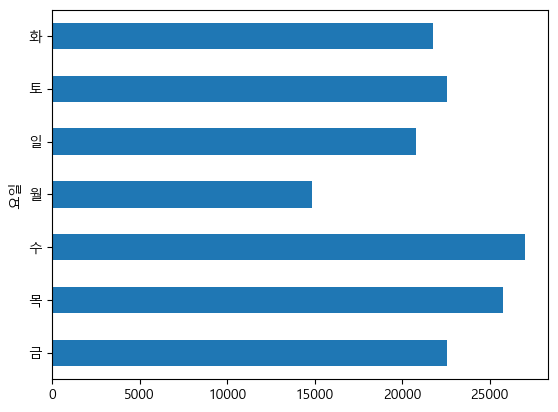

In [121]:
df.groupby('요일')['일일확진자'].mean().plot.barh()

<Axes: ylabel='요일'>

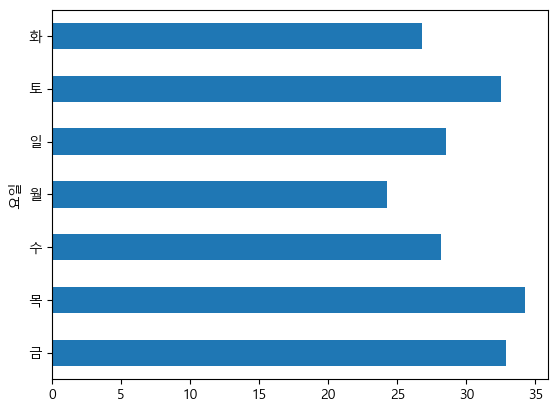

In [122]:
df.groupby('요일')['일일사망자'].mean().plot.barh()

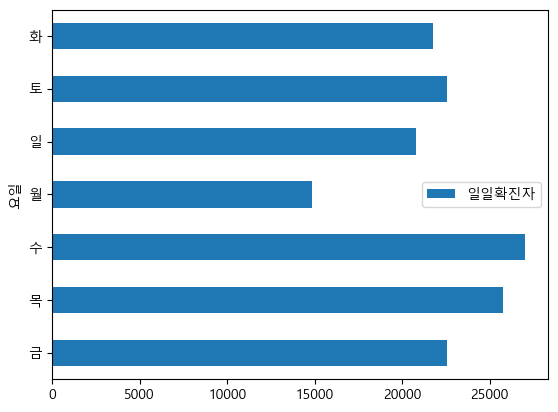

In [68]:
# 11
pivot_df = pd.pivot_table(
    df,
    index = '요일',
    values = '일일확진자', 
    aggfunc = 'mean'
).plot(kind='barh')

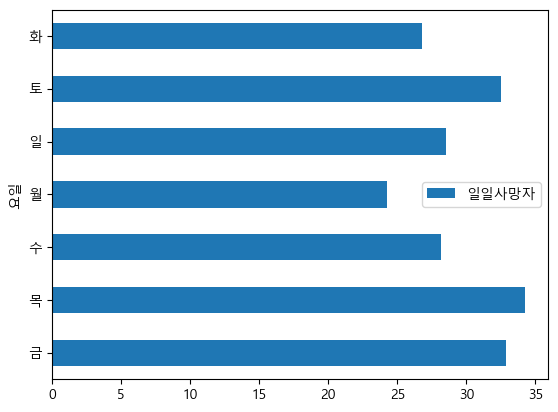

In [69]:
# 12
pivot_df = pd.pivot_table(
    df,
    index = '요일',
    values = '일일사망자', 
    aggfunc = 'mean'
).plot(kind='barh')

In [71]:
df2 = pd.read_csv("../csv/corona.csv", usecols=[1,2,3], parse_dates=[0])